In [ ]:
#IMPORTING LIBRARIES

In [1]:
import os
import time
import shutil
import itertools
import random
# import data handling tools 
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#READ DATA

In [2]:
data_dir = "hmnist_28_28_RGB.csv"
data = pd.read_csv(data_dir)

In [3]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
data.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [5]:
data.shape

(10015, 2353)

In [6]:
data.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


In [ ]:
#DATA PREPROCESSING

In [ ]:
#SPLIT DATA AND LABELS

In [7]:
Label = data["label"]
Data = data.drop(columns=["label"])

In [8]:
data["label"].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [ ]:
#HANDLING IMBALANCED DATASETS

In [9]:
from imblearn.over_sampling import RandomOverSampler   #augmentation

oversample = RandomOverSampler()
Data, Label  = oversample.fit_resample(Data, Label)
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)

Shape of Data : (46935, 28, 28, 3)


In [10]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6], dtype=int64)

In [11]:
data.isnull().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel2348    0
pixel2349    0
pixel2350    0
pixel2351    0
label        0
Length: 2353, dtype: int64

In [ ]:
#CONVERTING ABBREVIATIONS TO ITS WORDS

In [12]:
classes = {
    4: ('nv', 'Melanocytic nevi', ['Sensitivity to touch around the mole', 'Redness or inflammation around the mole'],['Avoid tight Clothing','Limit exposure to direct sunlight']),
    6: ('mel', 'Melanoma', ['Multiple colors within a mole', 'Bleeding or oozing from a mole'],['Eat a balanced diet rich in antioxidants and vitamins','Avoid smoking and limit alcohol consumption']),
    2: ('bkl', 'Benign keratosis-like lesions',  ['Itching or irritation in affected areas, Round or oval shaped growths', 'Very small growths clustered around the eyes or elsewhere on the face'],['Moisturize Regularly','Manage Stress by meditation or yoga']),
    1: ('bcc', 'Basal cell carcinoma', ['Surrounding skin becoming sunken or depressed','Formation of a flesh-coloured, pearl like bump'],['Avoid harmful chemicals','Wear Protective Clothing']),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage', ['Prone to Ulceration', 'Moist or friable surface structure'],['Use sunscreen with a high SPF','Keep the affected arear covered with a sterile dressing']),
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae', ['Swelling and burning in affected region', 'Thickening of the skin'],['Avoid tanning beds and sunlamps','Avoid hot shower and opt for lukewarm water']),
    3: ('df', 'Dermatofibroma', ['Dimpled appearance when pressed', 'Growing in size over time'],['Avoid using harsh chemicals or irritants','Drink plenty of water and maintain proper hydration']) 
    
}

In [ ]:
#SPLITING TRAIN AND TEST

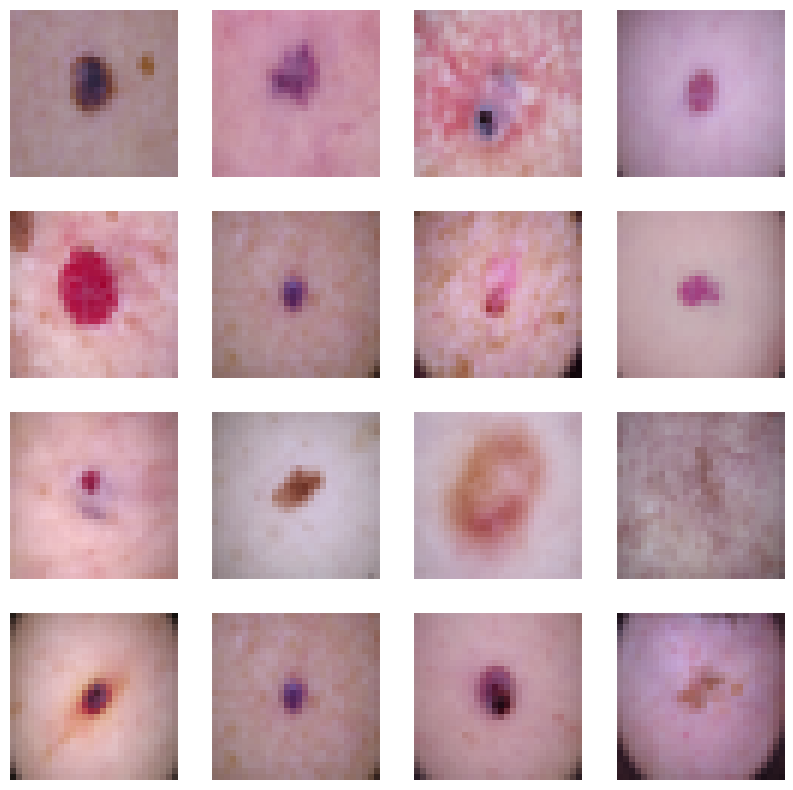

In [13]:
from sklearn.model_selection import train_test_split

# Assuming you have 'Data' and 'Label' from your previous code
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.2, random_state=42)

# Now you can use X_test in the provided code block
plt.figure(figsize=(10, 10))
for i in range(16): 
    plt.subplot(4, 4, i + 1)  # Create a subplot
    plt.imshow(X_test[i])    # Display the image
    plt.axis('off')           # Turn off axis labels
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(35201,)
(11734, 28, 28, 3)
(11734,)


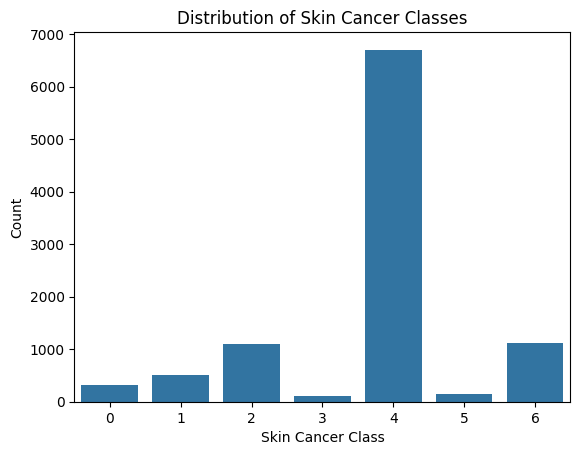

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of label counts
sns.countplot(data=data, x='label')
plt.xlabel('Skin Cancer Class')
plt.ylabel('Count')
plt.title('Distribution of Skin Cancer Classes')
plt.show()

In [ ]:
#Convert labels to categorical types

In [17]:
from tensorflow.keras.utils import to_categorical

# Your other code...

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train.shape

(35201, 7)

In [19]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0.]


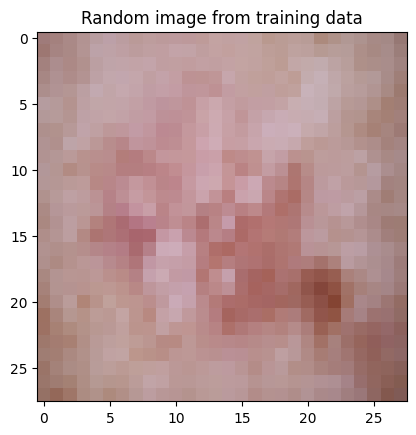

In [20]:
ind= random.randint(1,10000)
plt.imshow(X_train[ind], cmap='gray')
# plt.axis('off')
plt.title("Random image from training data")
plt.show()

In [ ]:
#Model Structure

In [21]:
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
# model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
# model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
# model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
# model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax'))
model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)         

In [ ]:
#Training model

In [22]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Use the callback in model.fit()
history = model.fit(X_train ,
                    y_train ,
                    epochs=25,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25


276/276 [==============================] - 62s 191ms/step - loss: 0.8225 - accuracy: 0.7111 - val_loss: 0.7953 - val_accuracy: 0.6986 - lr: 0.0010
Epoch 2/25
276/276 [==============================] - 54s 195ms/step - loss: 0.3407 - accuracy: 0.8804 - val_loss: 0.7865 - val_accuracy: 0.6901 - lr: 0.0010
Epoch 3/25
276/276 [==============================] - 54s 194ms/step - loss: 0.2143 - accuracy: 0.9250 - val_loss: 1.5479 - val_accuracy: 0.5452 - lr: 0.0010
Epoch 4/25
276/276 [==============================] - 57s 206ms/step - loss: 0.1616 - accuracy: 0.9447 - val_loss: 0.2056 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 5/25
276/276 [==============================] - 55s 199ms/step - loss: 0.1235 - accuracy: 0.9556 - val_loss: 0.2271 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 6/25
276/276 [==============================] - 52s 190ms/step - loss: 0.1054 - accuracy: 0.9633 - val_loss: 0.1710 - val_accuracy: 0.9398 - lr: 0.0010
Epoch 7/25
276/276 [==============================

In [23]:
from keras.utils import to_categorical

# Assuming y_train is your categorical labels
y_train_encoded = to_categorical(y_train, num_classes=7)

In [24]:
y_test_encoded = to_categorical(y_test, num_classes=7)

In [ ]:
#Show training history

In [25]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout
    plt.show()

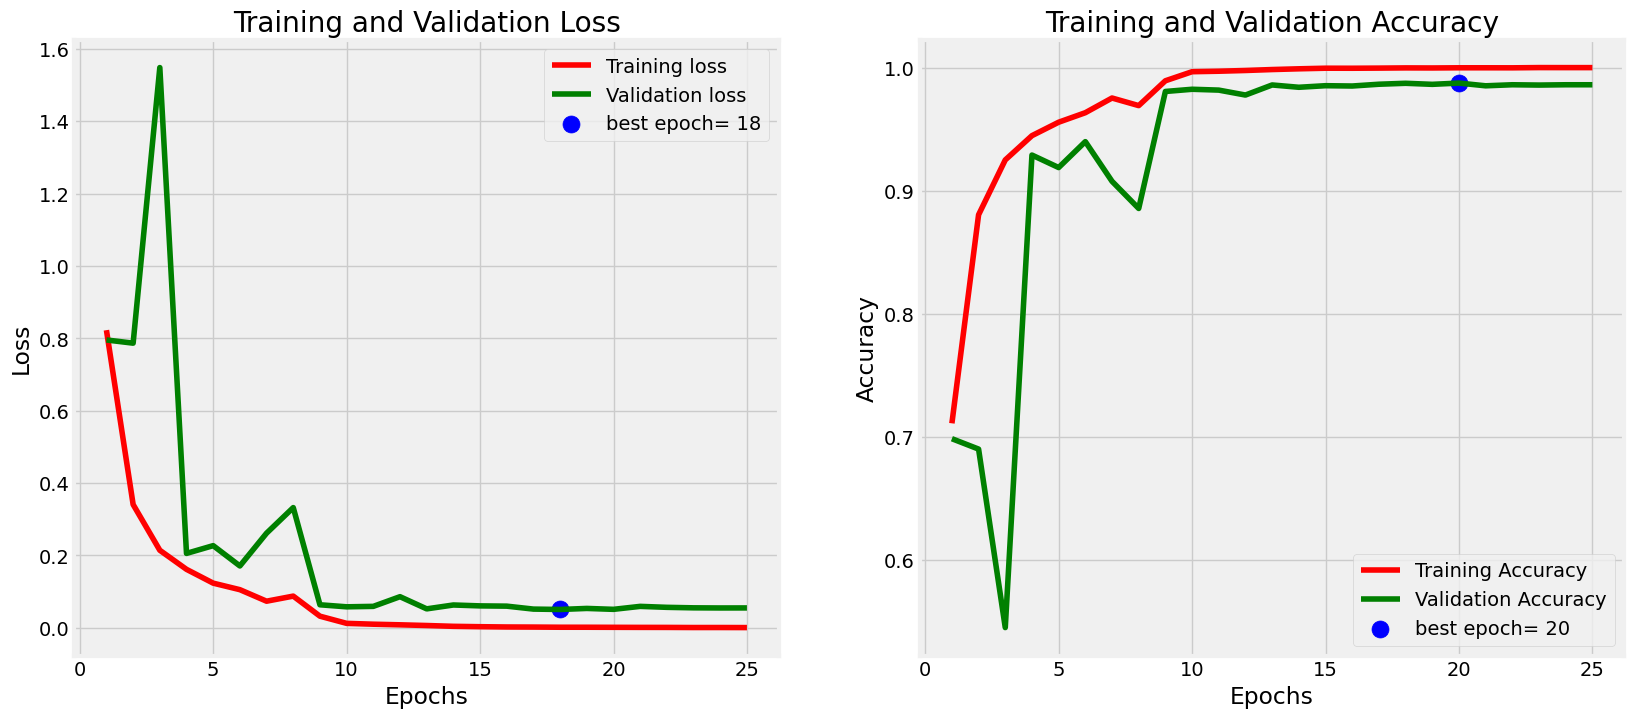

In [26]:
plot_training(history)

In [ ]:
#Model Evaluation

In [27]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

367/367 [==============================] - 7s 18ms/step - loss: 0.0550 - accuracy: 0.9860
Train Loss:  0.00039918895345181227
Train Accuracy:  0.9999715685844421
--------------------
Test Loss:  0.055004268884658813
Test Accuracy:  0.9860235452651978


In [28]:
y_true = np.array(y_test)
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred , axis=1)
y_true = np.argmax(y_true , axis=1)

367/367 [==============================] - 7s 17ms/step


In [ ]:
#CREATE CLASSES LABELS

In [29]:
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

[4, 6, 2, 1, 5, 0, 3]


In [ ]:
#SAVE THE MODEL

In [32]:
model.save("skin_cancer.h5")

1/1 [==============================] - 0s 421ms/step
Predicted: Actinic keratoses and intraepithelial carcinomae
Confidence: 100.00%
Symptoms:
- Swelling and burning in affected region
- Thickening of the skin
Precautions:
- Avoid tanning beds and sunlamps
- Avoid hot shower and opt for lukewarm water


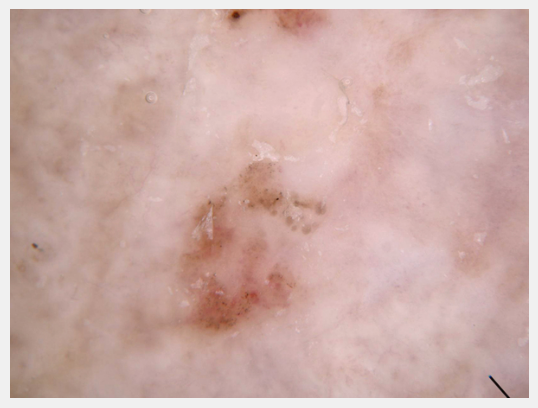

1/1 [==============================] - 0s 59ms/step
Predicted: Basal cell carcinoma
Confidence: 99.98%
Symptoms:
- Surrounding skin becoming sunken or depressed
- Formation of a flesh-coloured, pearl like bump
Precautions:
- Avoid harmful chemicals
- Wear Protective Clothing


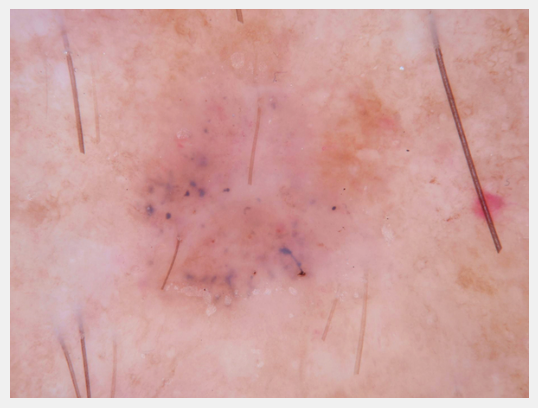

1/1 [==============================] - 0s 56ms/step
Predicted: Benign keratosis-like lesions
Confidence: 99.99%
Symptoms:
- Itching or irritation in affected areas, Round or oval shaped growths
- Very small growths clustered around the eyes or elsewhere on the face
Precautions:
- Moisturize Regularly
- Manage Stress by meditation or yoga


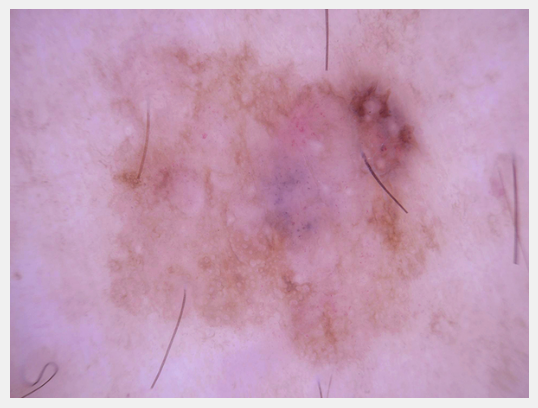

1/1 [==============================] - 0s 48ms/step
Predicted: Dermatofibroma
Confidence: 100.00%
Symptoms:
- Dimpled appearance when pressed
- Growing in size over time
Precautions:
- Avoid using harsh chemicals or irritants
- Drink plenty of water and maintain proper hydration


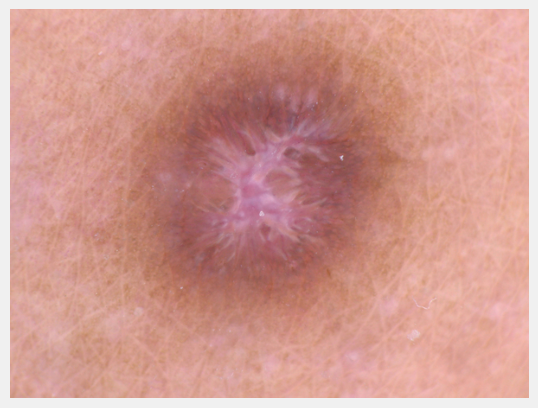

1/1 [==============================] - 0s 49ms/step
Predicted: Melanocytic nevi
Confidence: 100.00%
Symptoms:
- Sensitivity to touch around the mole
- Redness or inflammation around the mole
Precautions:
- Avoid tight Clothing
- Limit exposure to direct sunlight


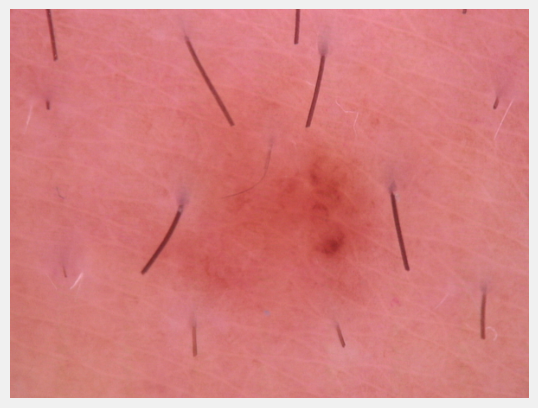

1/1 [==============================] - 0s 54ms/step
Predicted: Melanoma
Confidence: 99.84%
Symptoms:
- Multiple colors within a mole
- Bleeding or oozing from a mole
Precautions:
- Eat a balanced diet rich in antioxidants and vitamins
- Avoid smoking and limit alcohol consumption


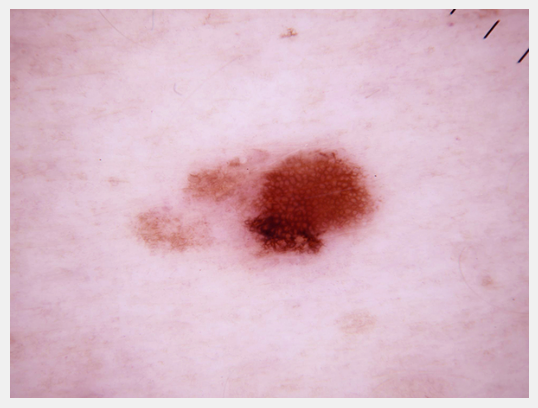

1/1 [==============================] - 0s 58ms/step
Predicted: Pyogenic granulomas and hemorrhage
Confidence: 100.00%
Symptoms:
- Prone to Ulceration
- Moist or friable surface structure
Precautions:
- Use sunscreen with a high SPF
- Keep the affected arear covered with a sterile dressing


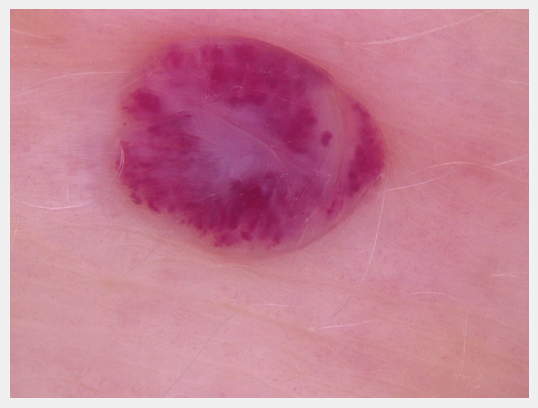

In [30]:
import cv2
import os
from PIL import Image
import numpy as np

directory = "C:\\Users\\srika\\skin\\disease"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file_path.endswith(".jpg") or file_path.endswith('.jpeg') or file_path.endswith(".png"):
            # Load and preprocess the image
            image = Image.open(file_path)
            image = image.resize((28, 28))
            img = np.array(image).reshape(-1, 28, 28, 3)
            
            # Predict the disease
            result = model.predict(img)
            max_prob = max(result[0])
            class_ind = result[0].tolist().index(max_prob)
            
            # Get disease information from the classes dictionary
            disease_code, disease_name, symptoms, precautions = classes[class_ind]
            
            # Calculate confidence as a percentage
            confidence_percentage = max_prob * 100
            
            # Extract filename without extension and folder name from file_path
            folder_name = os.path.basename(os.path.dirname(file_path))
            file_name = os.path.splitext(os.path.basename(file_path))[0]
            
            print("Predicted:", disease_name)
            print("Confidence:", f"{confidence_percentage:.2f}%")  # Print confidence as a percentage with 2 decimal places
            print("Symptoms:")
            for symptom in symptoms:
                print("- " + symptom)
            print("Precautions:")
            for precaution in precautions:
                print("- " + precaution)
            
            # Display the image
            test_img = cv2.imread(file_path)
            plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

In [31]:
print(classification_report(y_true,y_pred,labels=classes_labels))

              precision    recall  f1-score   support

           4       0.99      0.91      0.95      1663
           6       0.96      1.00      0.98      1755
           2       0.97      0.99      0.98      1651
           1       0.99      1.00      1.00      1689
           5       1.00      1.00      1.00      1680
           0       1.00      1.00      1.00      1667
           3       1.00      1.00      1.00      1629

    accuracy                           0.99     11734
   macro avg       0.99      0.99      0.99     11734
weighted avg       0.99      0.99      0.99     11734

